In [1]:
from matplotlib.patches import ConnectionPatch

In [2]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

In [3]:
def dp(dist_mat):
    
    
    #create the matrix
    N, M = dist_mat.shape
    
    cost_mat = np.zeros((N + 1,M + 1))
    
    
    #populating row 0 and column 0 with "infinity"
    for i in range (1, N+1):
        cost_mat[i, 0] = np.inf
    for i in range (1, M+1):
        cost_mat[0, i] = np.inf
    
    #initialize traceback matrix for tracking tracebacks
    traceback_mat = np.zeros((N,M))
    
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i,j], #both advance
                cost_mat[i, j+1], #bottom advances, top doesn't
                cost_mat[i+1, j] #top advances, bottom doesn't
            ]
            #get the minimum penalty (index)
            i_penalty = np.argmin(penalty)
            
            #populate the cell in the cost matrix
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            
            #populate the cell in traceback matrix
            traceback_mat[i, j] = i_penalty
            
    i = N - 1
    j = M - 1
    
    #create an array that describes the path tracing from bottom right
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i,j]
        if tb_type == 0: #both advance
            i = i - 1
            j = j - 1
        elif tb_type == 1: #top advances (backwards), bottom doesnt
            i = i - 1
        elif tb_type == 2: #bottom advances (backwards), top doesn't
            j = j - 1
        path.append((i,j))
    
    #remove rows of infinity
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

EXAMPLE 1

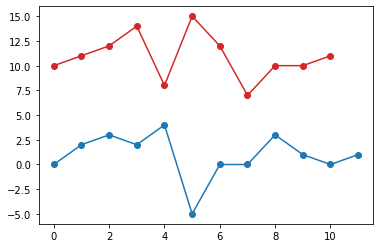

In [4]:
x = np.array([0,1,2,4,-2, 5, 2,-3, 0, 0, 1])
y = np.array([0,2,3,2,4,-5, 0, 0, 3, 1, 0, 1])

plt.figure(figsize = (6,4))
plt.plot(np.arange(x.shape[0]), x +10, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y , "-o", c="C0")

In [5]:
#first create the distance matrix to be placed into the cost matrix function

#set dimensions based on arrays from before
N = x.shape[0]
M = y.shape[0]

#initialize matrix, populate matrix with zeros
dist_mat = np.zeros((N,M))

#populate matrix with actual distance values
for i in range(N):
    for j in range(M):
        dist_mat[i,j] = abs(x[i] - y[j])

print (dist_mat)

[[ 0.  2.  3.  2.  4.  5.  0.  0.  3.  1.  0.  1.]
 [ 1.  1.  2.  1.  3.  6.  1.  1.  2.  0.  1.  0.]
 [ 2.  0.  1.  0.  2.  7.  2.  2.  1.  1.  2.  1.]
 [ 4.  2.  1.  2.  0.  9.  4.  4.  1.  3.  4.  3.]
 [ 2.  4.  5.  4.  6.  3.  2.  2.  5.  3.  2.  3.]
 [ 5.  3.  2.  3.  1. 10.  5.  5.  2.  4.  5.  4.]
 [ 2.  0.  1.  0.  2.  7.  2.  2.  1.  1.  2.  1.]
 [ 3.  5.  6.  5.  7.  2.  3.  3.  6.  4.  3.  4.]
 [ 0.  2.  3.  2.  4.  5.  0.  0.  3.  1.  0.  1.]
 [ 0.  2.  3.  2.  4.  5.  0.  0.  3.  1.  0.  1.]
 [ 1.  1.  2.  1.  3.  6.  1.  1.  2.  0.  1.  0.]]


In [6]:
# get path and cost_mat

path, cost_mat = dp(dist_mat)

#print alignment costs
print ("Alignment cost: {:.4f}".format(cost_mat[N-1, M-1]))
print ("Normalized Alignment cost: {:.4f}".format(cost_mat[N-1, M-1]/(N + M)))

Alignment cost: 14.0000
Normalized Alignment cost: 0.6087


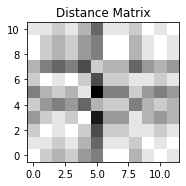

In [7]:
plt.figure(figsize =(6,4))
plt.subplot(121)
plt.title("Distance Matrix")
plt.imshow(dist_mat, cmap =plt.cm.binary, interpolation = "nearest", origin ="lower")

plt.show()

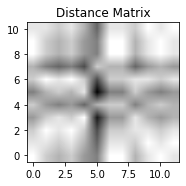

In [8]:
plt.figure(figsize =(6,4))
plt.subplot(121)
plt.title("Distance Matrix")
plt.imshow(dist_mat, cmap =plt.cm.binary, interpolation = "bilinear", origin ="lower")

plt.show()

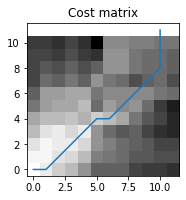

In [9]:
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap = plt.cm.binary, interpolation="nearest", origin = "lower")
x_path, y_path = zip(*path)
plt.plot(x_path, y_path)

plt.show()

In [10]:
print (x_path, y_path)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10) (0, 0, 1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11)


(-0.55, 11.55, -6.0, 16.0)

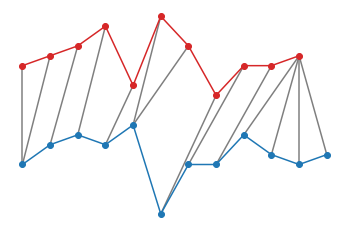

In [11]:
plt.figure()
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 10, y[y_j]], c="C7")
plt.plot(np.arange(x.shape[0]), x + 10, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y, "-o", c="C0")
plt.axis("off")

Example 2

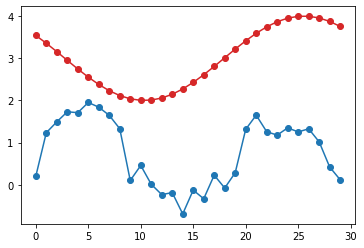

In [12]:
idx = np.linspace(0, 10, num=30)

x = np.cos(0.6*idx+1)

y = np.sin(idx) + np.random.uniform(size=30)

plt.figure(figsize = (6,4))
plt.plot(np.arange(x.shape[0]), x + 3, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y, "-o", c="C0")


In [13]:
M = x.shape[0]
N = y.shape[0]

dist_mat = np.zeros((N,M))

for i in range(M):
    for j in range (N):
        dist_mat[i,j] = abs(x[i] - y[j])

In [14]:
print (dist_mat)

[[3.36494097e-01 6.94874663e-01 9.52119960e-01 1.19091167e+00
  1.17010994e+00 1.41203870e+00 1.30024353e+00 1.10689864e+00
  7.90451323e-01 4.37005362e-01 8.03575738e-02 5.26764512e-01
  7.71118097e-01 7.24360892e-01 1.22890267e+00 6.65055724e-01
  8.69733322e-01 3.10816417e-01 6.15624119e-01 2.53092498e-01
  7.74861767e-01 1.11129501e+00 7.19206758e-01 6.38289542e-01
  8.10578741e-01 7.14650955e-01 7.87456447e-01 4.78400432e-01
  1.16925274e-01 4.19416795e-01]
 [1.52113123e-01 8.79255637e-01 1.13650093e+00 1.37529264e+00
  1.35449091e+00 1.59641967e+00 1.48462450e+00 1.29127962e+00
  9.74832297e-01 2.52624389e-01 1.04023400e-01 3.42383539e-01
  5.86737124e-01 5.39979919e-01 1.04452169e+00 4.80674750e-01
  6.85352348e-01 1.26435443e-01 4.31243146e-01 6.87115248e-02
  9.59242740e-01 1.29567598e+00 9.03587731e-01 8.22670516e-01
  9.94959714e-01 8.99031929e-01 9.71837421e-01 6.62781406e-01
  6.74556995e-02 2.35035821e-01]
 [4.74492132e-02 1.07881797e+00 1.33606327e+00 1.57485498e+00
  1.

In [15]:
path, cost_mat = dp(dist_mat)

print ("Alignment cost: {:.4f}".format(cost_mat[N-1,M-1]))
print ("Normalized Alignment Cost: {:.3f}".format(cost_mat[N-1, M-1]/(N+M)))

print (cost_mat)

Alignment cost: 16.7573
Normalized Alignment Cost: 0.279
[[ 0.3364941   1.03136876  1.98348872  3.17440039  4.34451033  5.75654903
   7.05679256  8.1636912   8.95414252  9.39114789  9.47150546  9.99826997
  10.76938807 11.49374896 12.72265163 13.38770735 14.25744067 14.56825709
  15.18388121 15.43697371 16.21183547 17.32313048 18.04233724 18.68062679
  19.49120553 20.20585648 20.99331293 21.47171336 21.58863863 22.00805543]
 [ 0.48860722  1.21574973  2.16786969  3.35878136  4.5288913   5.94093
   7.24117353  8.34807217  9.1385235   9.20676691  9.31079031  9.65317385
  10.23991097 10.77989089 11.82441259 12.30508734 12.99043969 13.11687513
  13.54811827 13.6168298  14.57607254 15.87174852 16.77533625 17.59800677
  18.59296648 19.49199841 20.46383583 21.12661724 21.19407294 21.42910876]
 [ 0.53605643  1.56742519  2.551813    3.74272467  4.91283461  6.32487331
   7.62511684  8.73201548  9.52246681  9.19158555  9.49517128  9.45361151
   9.8407863  10.18120388 11.02616324 11.30727565 11.793

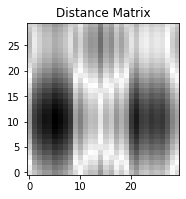

In [16]:
plt.figure(figsize=(6,4))
plt.subplot(121)
plt.title("Distance Matrix")
plt.imshow(dist_mat, cmap = plt.cm.binary, interpolation ="nearest", origin ="lower")
           
plt.show()


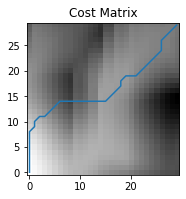

In [17]:
plt.figure(figsize = (6,4))
plt.subplot(122)
plt.title("Cost Matrix")
plt.imshow(cost_mat, cmap = plt.cm.binary, interpolation = "nearest", origin = "lower")

x_path, y_path = zip(*path)

plt.plot(x_path, y_path)

plt.show()

(-1.4500000000000002, 30.45, -1.2727995567640695, 11.579582740207575)

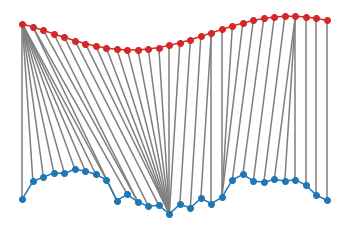

In [18]:
plt.figure(figsize=(6,4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 10 , y[y_j]], c="C7")
plt.plot(np.arange(x.shape[0]), x + 10, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y, "-o", c="C0")

plt.axis("off")

